<a href="https://colab.research.google.com/github/dimsparagis0210/MLTask/blob/main/ML_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Απαλλακτική εργασία στο μάθημα Μηχανική Μάθηση**

**Σπαράγγης Δημήτρης (ics22066)**
</br>
**Βιτσιώτη Μαγδαληνή (ics22030)**

# Introduction

## Getting Dataset from Google Drive

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
import pandas as pd

# Replace 'path_to_your_file.csv' with the actual path
file_path = '/content/drive/MyDrive/ML_task/Covid Data.csv'
df = pd.read_csv(file_path)

# Check the dataset
print(df.head())

   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2        2             1              2   
1   72        97         2  ...       2        2             1              2   
2   55        97         1  ...       2        2             2              2   
3   53         2         2  ...       2        2             2              2   
4   68        97         1  ...       2        2             1              2   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO

## Statistics for the data

In [109]:
# Data size
print("Number of Samples: ", df.shape[0])
print("Number of Features: ", df.shape[1])

Number of Samples:  1048575
Number of Features:  21


In [110]:
# Check for missing values in each column (WRONG USE: FIX)
missing_values = df.isnull().sum()

# Display missing values
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64


Distribution of the dependent variable: 
CLASIFFICATION_FINAL
7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: count, dtype: int64


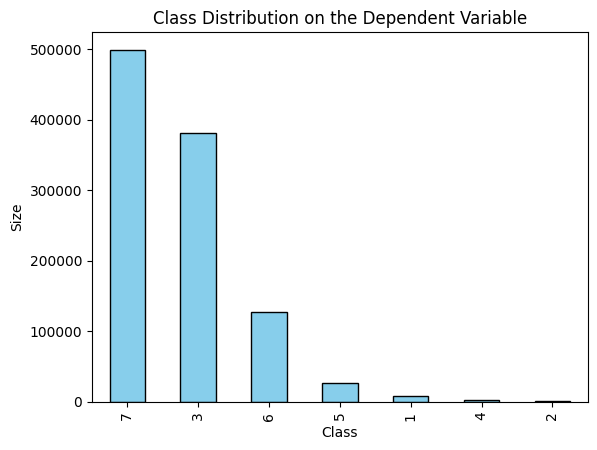

In [111]:
import matplotlib.pyplot as plt

# Check for class imbalance
class_distribution = df['CLASIFFICATION_FINAL'].value_counts()

print("Distribution of the dependent variable: ")
print(class_distribution)

# Diagram
class_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Class Distribution on the Dependent Variable")
plt.xlabel("Class")
plt.ylabel("Size")
plt.show()

# Data Preprocessing

## Checking for missing values in every column (Missing values are represented by 97, 98 and 99)


In [112]:
import numpy as np

# Replace placeholders with NaN
df = df.replace([97, 98, 99], np.nan)

# Iterate over columns and print nullable values
for col in df.columns:
    print("Column:", col)
    print("Nullables:", df[col].isnull().sum())

Column: USMER
Nullables: 0
Column: MEDICAL_UNIT
Nullables: 0
Column: SEX
Nullables: 0
Column: PATIENT_TYPE
Nullables: 0
Column: DATE_DIED
Nullables: 0
Column: INTUBED
Nullables: 855869
Column: PNEUMONIA
Nullables: 16003
Column: AGE
Nullables: 345
Column: PREGNANT
Nullables: 527265
Column: DIABETES
Nullables: 3338
Column: COPD
Nullables: 3003
Column: ASTHMA
Nullables: 2979
Column: INMSUPR
Nullables: 3404
Column: HIPERTENSION
Nullables: 3104
Column: OTHER_DISEASE
Nullables: 5045
Column: CARDIOVASCULAR
Nullables: 3076
Column: OBESITY
Nullables: 3032
Column: RENAL_CHRONIC
Nullables: 3006
Column: TOBACCO
Nullables: 3220
Column: CLASIFFICATION_FINAL
Nullables: 0
Column: ICU
Nullables: 856032


### Analyzing the DATE_DIED Column

In [113]:
df['DEATH'] = [2 if row=='9999-99-99' else 1 for row in df['DATE_DIED']]
df['DEATH'].value_counts()

,count
DEATH,
2,971633
1,76942


Excluding it because of high number of missing values

In [114]:
df = df.drop('DATE_DIED', axis = 1)
df = df.drop('DEATH', axis = 1)

df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,NaN,1.0,65.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
1,2,1,2,1,NaN,1.0,72.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN
2,2,1,2,2,1.0,2.0,55.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
3,2,1,1,1,NaN,2.0,53.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
4,2,1,2,1,NaN,2.0,68.0,NaN,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN


### Excluding INTUBED and ICU columns because of high number of missing values

In [115]:
df = df.drop(['ICU', 'INTUBED'], axis=1)

### Handling missing values in columns PNEUMONIA, AGE, DIABETES, COPD, ASTHMA, INMSUPR, HIPERTENSION, OTHER_DISEASE, CARDIOVASCULAR, OBESITY, RENAL_CHRONIC, TOBACCO

In [116]:
df = df.fillna(df.mean())


print("\nNumber of missing values after handling:")
print(df_imputed.isnull().sum())


Number of missing values after handling:
USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
dtype: int64


### Encoding the columns with boolean values(1 = True and 2 = False)

In [117]:
from sklearn.preprocessing import LabelEncoder

boolean_columns = ['SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']

for col in boolean_columns:
  df[col] = LabelEncoder().fit_transform(df[col])

print(df.head())

   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  PNEUMONIA   AGE  PREGNANT  \
0      2             1    0             0          0  65.0  2.000000   
1      2             1    1             0          0  72.0  1.984403   
2      2             1    1             1          2  55.0  1.984403   
3      2             1    0             0          2  53.0  2.000000   
4      2             1    1             0          2  68.0  1.984403   

   DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0         2     2       2        2             0              2   
1         2     2       2        2             0              2   
2         0     2       2        2             2              2   
3         2     2       2        2             2              2   
4         0     2       2        2             0              2   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  
0               2        2              2        2                     3  
1             

### Feature Selection(To do)

### Checking for class imbalance

In [118]:
print("Class distribution in 'classification':")
print(df['CLASIFFICATION_FINAL'].value_counts())

Class distribution in 'classification':
CLASIFFICATION_FINAL
7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: count, dtype: int64


### Feature Scaling

In [119]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,4.992595e-01,1.907646e-01,1.717637e+00,4.177565e+01,1.984403e+00,1.758419e+00,1.968408e+00,1.936940e+00,1.969727e+00,1.686659e+00,1.941707e+00,1.957453e+00,1.692283e+00,1.961077e+00,1.835995e+00,5.305653e+00
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,6.853730e-01,1.687676e+01,8.736930e-02,6.493211e-01,2.435629e-01,3.454017e-01,2.374536e-01,7.249416e-01,3.292074e-01,2.834622e-01,7.196199e-01,2.710441e-01,5.459327e-01,1.881165e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.000000e+01,1.984403e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
50%,2.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,2.000000e+00,4.000000e+01,1.984403e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00
75%,2.000000e+00,1.200000e+01,1.000000e+00,0.000000e+00,2.000000e+00,5.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00
max,2.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,2.000000e+00,1.210000e+02,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00


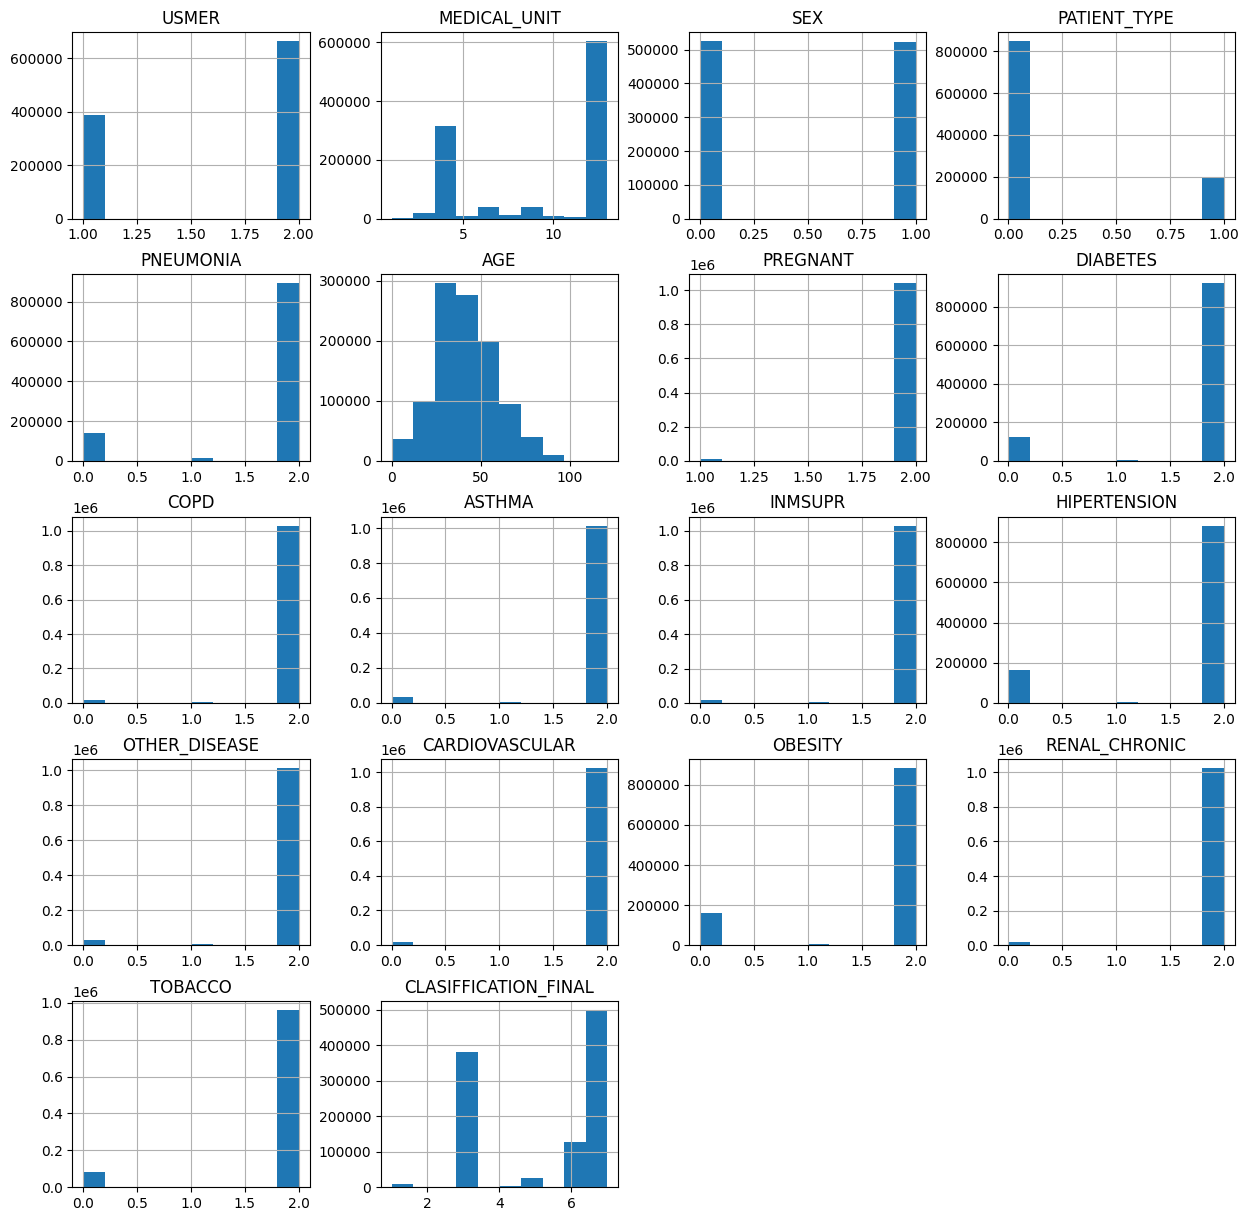

In [120]:
import matplotlib.pyplot as plt
df.hist(figsize=(15, 15))
plt.show()

#### The AGE COLUMN needs to be scaled

In [121]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the selected columns
df['AGE'] = scaler.fit_transform(df[['AGE']])

# Check the result
print(df['AGE'].head())


0    1.376115
1    1.790886
2    0.783584
3    0.665078
4    1.553874
Name: AGE, dtype: float64


### Splitting the dataset into Train and Test set

In [122]:
from sklearn.model_selection import train_test_split

X = df.drop('CLASIFFICATION_FINAL', axis = 1)
y = df['CLASIFFICATION_FINAL']

X_train, X_test, y_train, y_tesy = train_test_split(X, y, test_size = 0.2, random_state = 42)